In [one](https://agailloty.rbind.io/en/project/suicide-evolution/) of my Kaggle kernels I used ggplot2 to represent the difference of suicide rate in many countries between 1985 and 2014 ! In this short post I want to focus on this time period (1986 and 2014) to visualize so we can see how suicide evolved in some countries of the world.

In [1]:
options(warn = -1)
suppressPackageStartupMessages(library(tidyverse))
library(ggthemes)
library(ggrepel)

## Let's read in the dataset

In [2]:
suicide <- read.csv("master.csv")

In [3]:
glimpse(suicide)

Observations: 27,820
Variables: 12
$ ï..country         <fct> Albania, Albania, Albania, Albania, Albania, Alb...
$ year               <int> 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, ...
$ sex                <fct> male, male, female, male, male, female, female, ...
$ age                <fct> 15-24 years, 35-54 years, 15-24 years, 75+ years...
$ suicides_no        <int> 21, 16, 14, 1, 9, 1, 6, 4, 1, 0, 0, 0, 2, 17, 1,...
$ population         <int> 312900, 308000, 289700, 21800, 274300, 35600, 27...
$ suicides.100k.pop  <dbl> 6.71, 5.19, 4.83, 4.59, 3.28, 2.81, 2.15, 1.56, ...
$ country.year       <fct> Albania1987, Albania1987, Albania1987, Albania19...
$ HDI.for.year       <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ...
$ gdp_for_year....   <fct> "2,156,624,900", "2,156,624,900", "2,156,624,900...
$ gdp_per_capita.... <int> 796, 796, 796, 796, 796, 796, 796, 796, 796, 796...
$ generation         <fct> Generation X, Silent, Generation X, G.I. Generat...


In [4]:
suicide <- suicide %>%
rename(country = ï..country, 
       gdp_per_capita = gdp_per_capita...., 
       gdp_for_year = gdp_for_year....)

The dataset contains 27820 rows and 12 columns. Since the purpose of this post is to plot the graph of evolution I'm skipping all the exploratory data analysis. I already did it in my Kaggle kernel

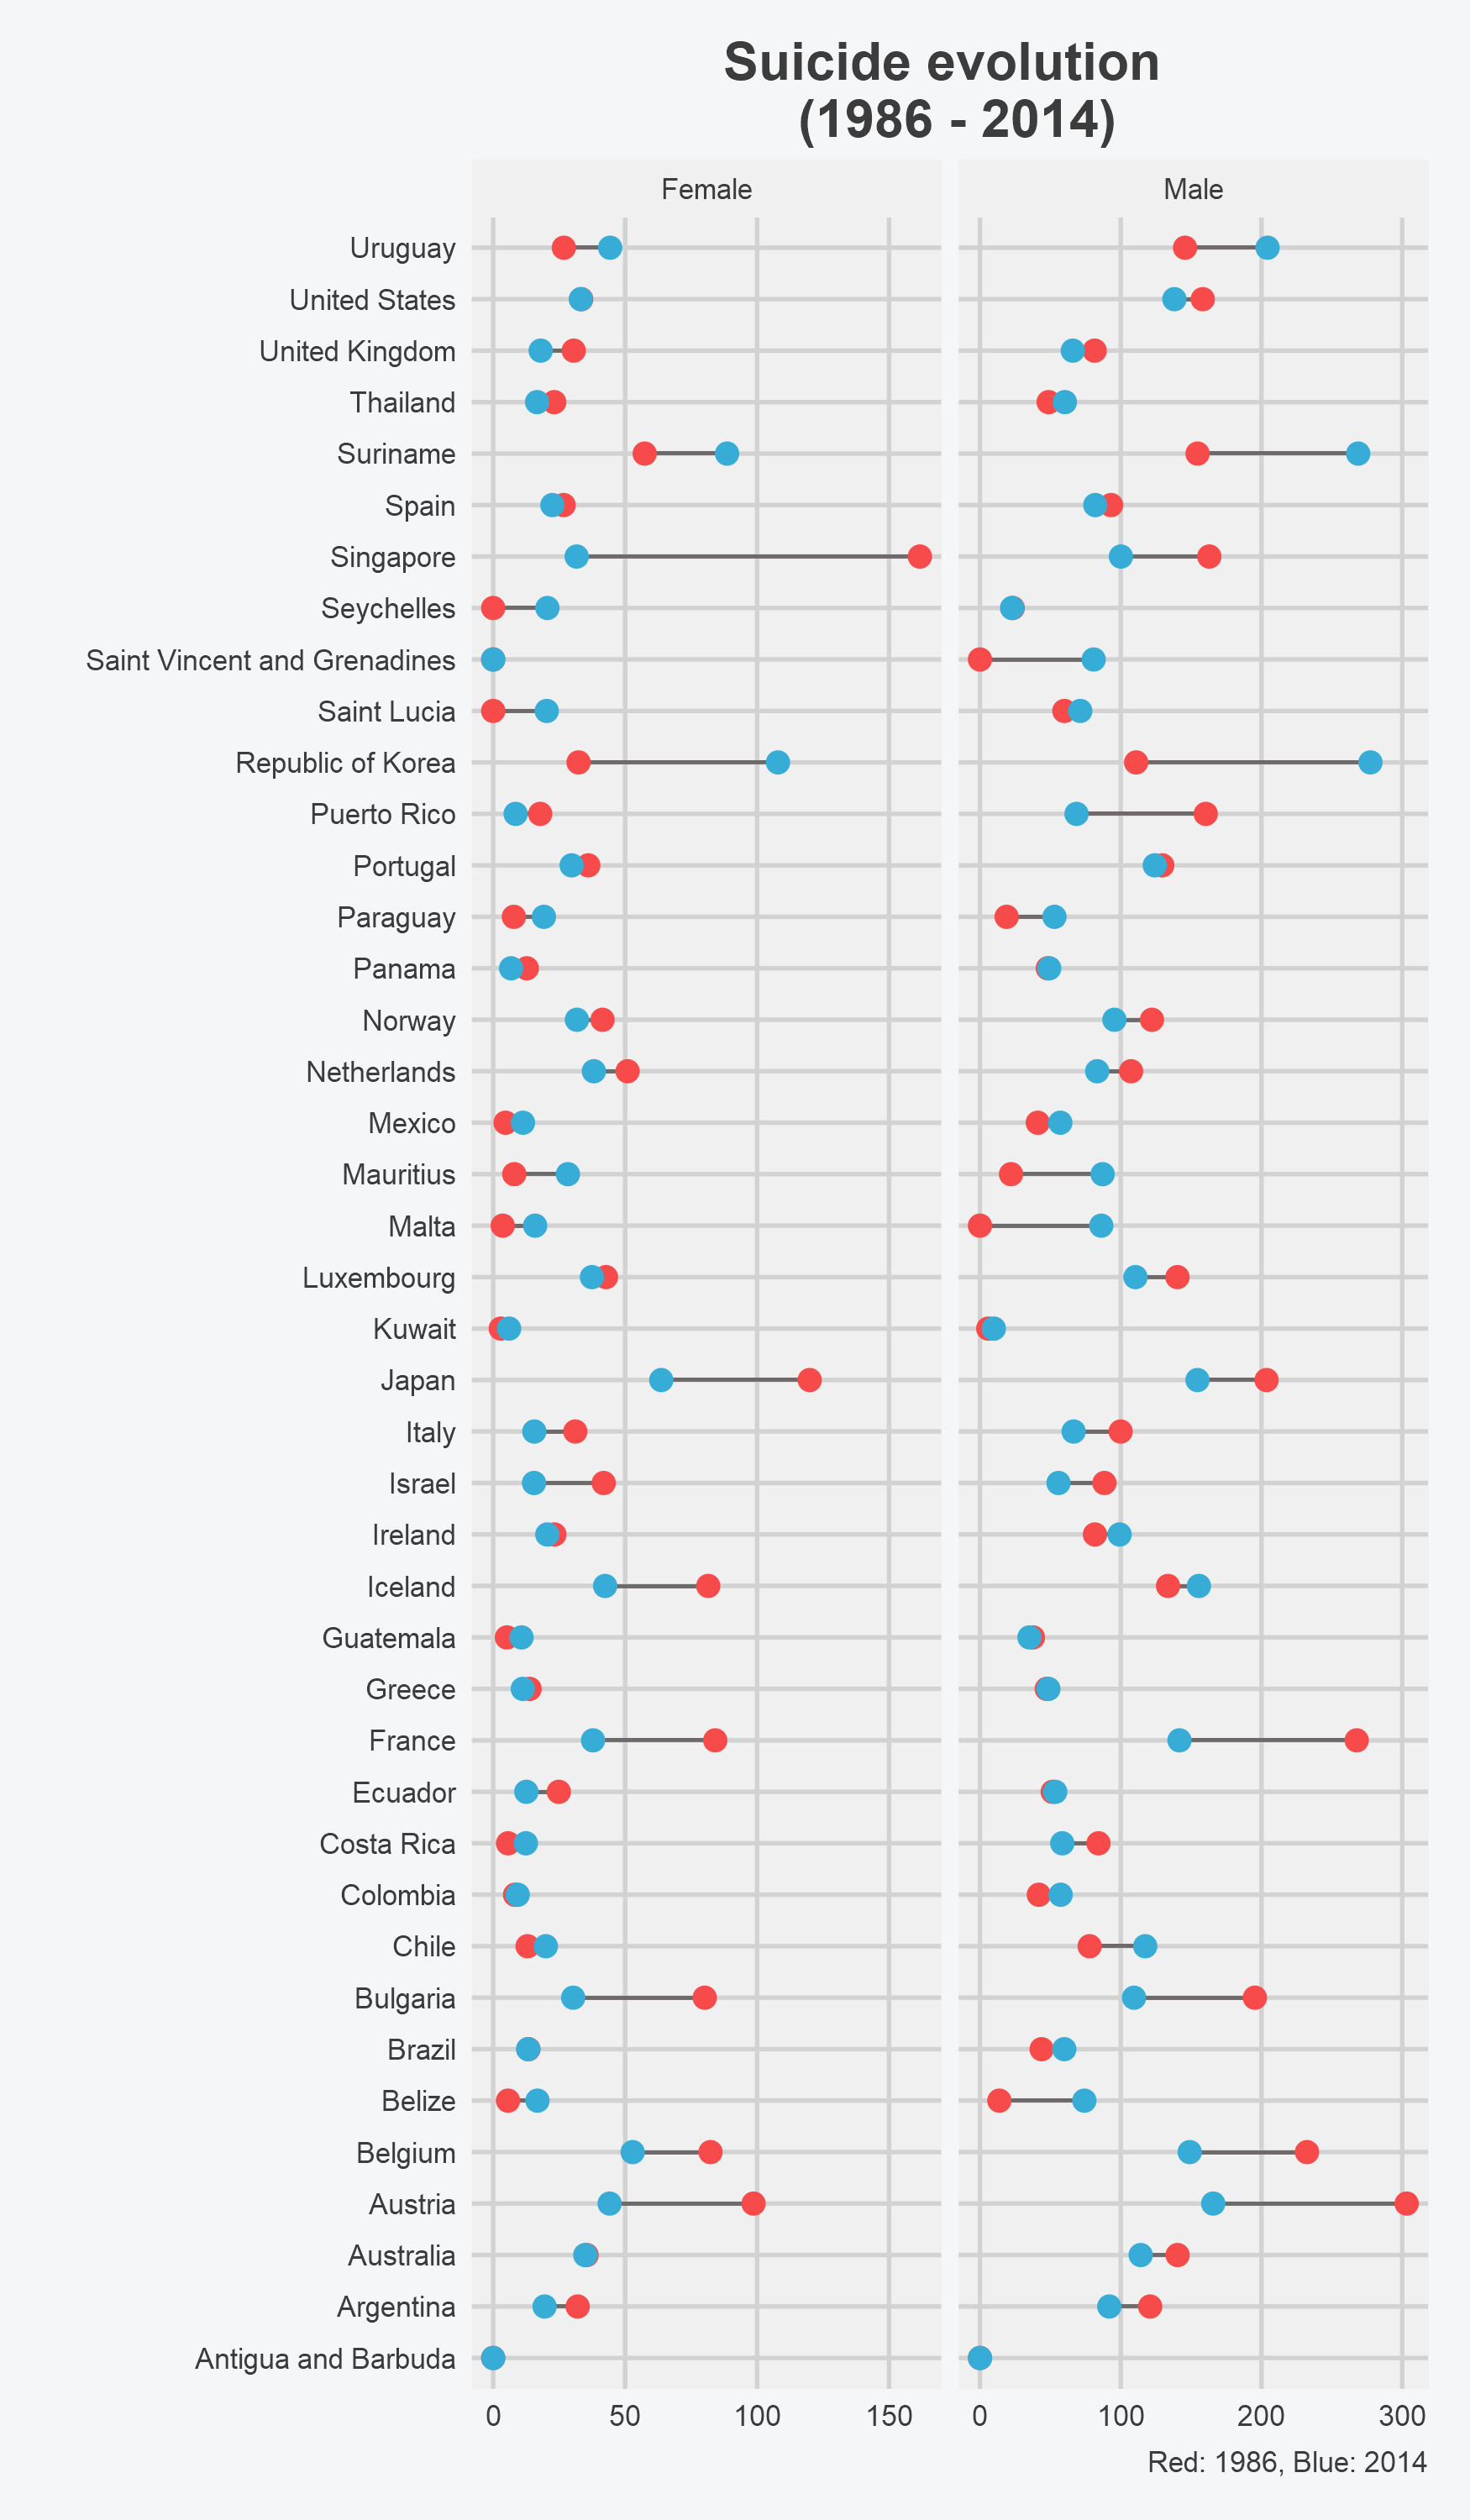

In [5]:
options(repr.plot.height = 12, repr.plot.res = 250)

# Need to reshape the data
mixed_df <- suicide %>% 
group_by(country, year, sex) %>% 
summarize(nb_occurence = n(), 
          nb_suicide = sum(suicides.100k.pop)) %>% 
data.frame %>%
spread_(key_col = "year", value_col = "nb_suicide") %>% 
select(country, sex, "1986", "2014") %>% na.omit # From long to wide data


colnames(mixed_df) <- c("country", "sex", "yr_1986", "yr_2014")
comparison_mixed_df <- mixed_df 
sex_label <- c("Female", "Male")
names(sex_label) <- c("female", "male") # for the facet_grid in ggplot

# The actual ggplot object 

pl <- ggplot(comparison_mixed_df) +
  geom_segment( aes(x=country, xend=country, y=yr_1986, yend=yr_2014), color="#6E6A6A") +
  geom_point( aes(x=country, y=yr_1986), color="#F74B4B", size=3 ) +
  geom_point( aes(x=country, y=yr_2014),color="#36ACD7", size=3 ) +
  coord_flip()+ 
  theme_fivethirtyeight() + theme(
    legend.position = "top",
      plot.title=element_text(hjust=0.5),
      plot.background=element_rect(fill="#F4F6F8")
  ) + facet_grid(~sex, scale = "free_x", labeller = labeller(sex = sex_label)) + 
labs(title="Suicide evolution \n (1986 - 2014)", x="", 
     y="Suicide per 100K deaths",
    caption="Red: 1986, Blue: 2014")
pl

In [6]:
suicide_features <- suicide %>% 
select(country, year, sex, population, gdp_per_capita, suicides.100k.pop)

suicide_1986_2014 <- suicide_features %>% 
filter(year == 1986 | year == 2014)

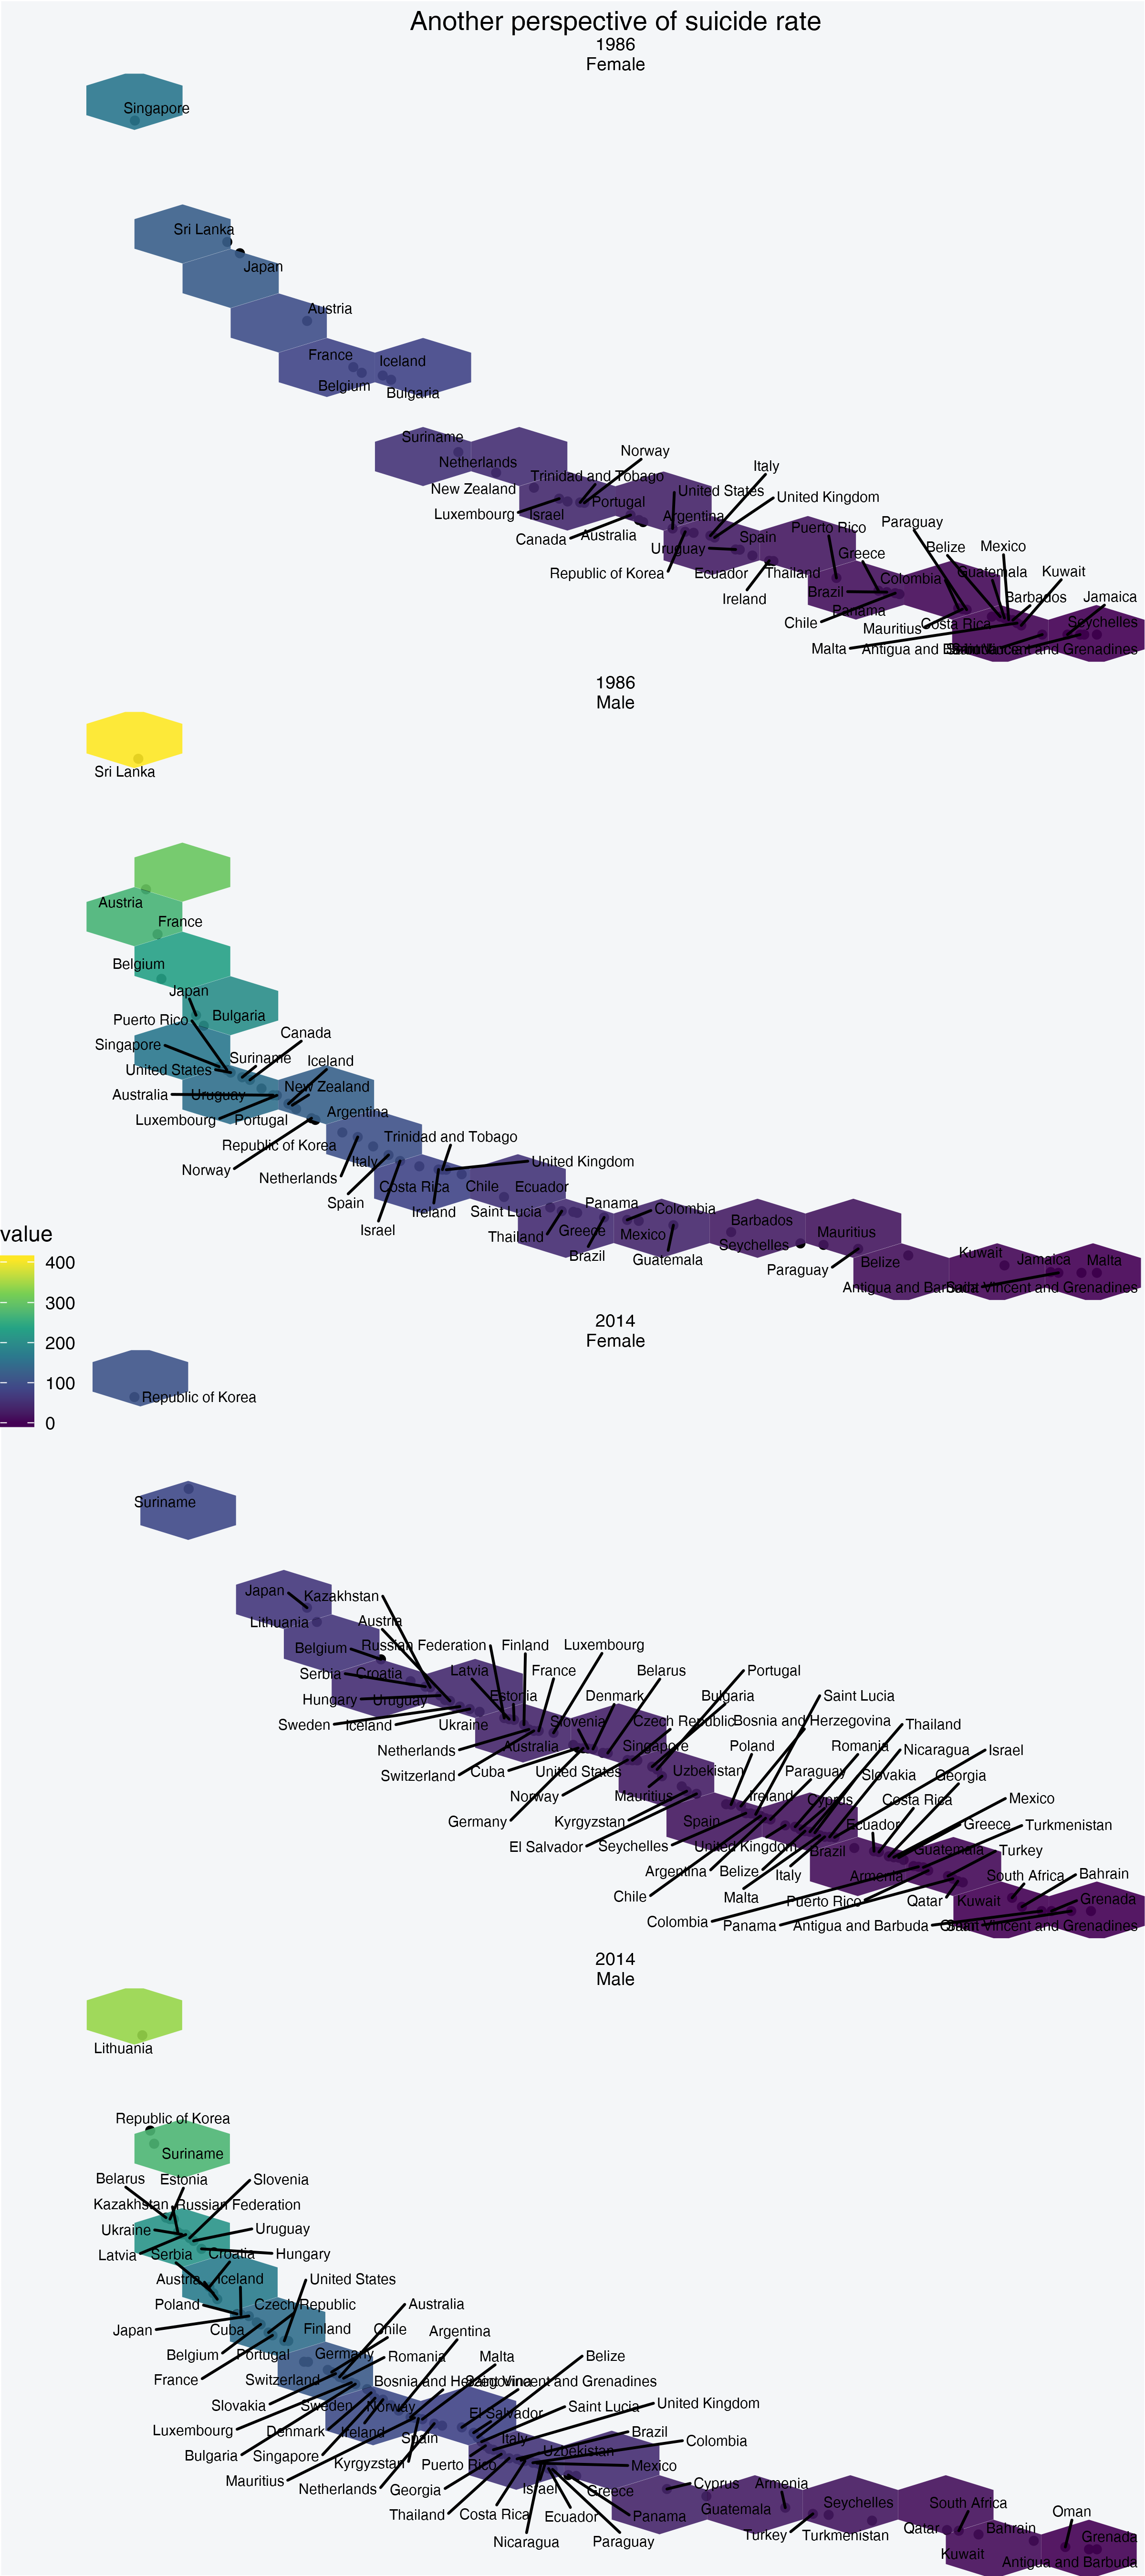

In [7]:
options(repr.plot.width = 8, repr.plot.height = 18, repr.plot.res = 300)
suicide_1986_2014 %>% 
group_by(country, year, sex) %>%
summarize(gdp_per_capita = mean(gdp_per_capita), 
          suicide_100k = sum(suicides.100k.pop), population = sum(population)) %>% 
arrange(desc(suicide_100k)) %>% ungroup %>% mutate(rank = 1:nrow(.)) %>% 
ggplot(aes(x = rank, y = suicide_100k)) +
geom_point() + stat_summary_hex(aes(z =  suicide_100k), 
                   bins=10, fun = mean, alpha = 0.9, name = "suicide / 100k deaths") +  
scale_fill_viridis_c() +
facet_wrap(year~sex, scales = "free", nrow = 4, labeller = labeller(sex = sex_label)) + 
geom_text_repel(aes(label = country), size = 2.5) + theme_void() +
theme(
    legend.position = "left",
      plot.title=element_text(hjust=0.5),
      plot.background=element_rect(fill="#F4F6F8")) +
labs(title = "Another perspective of suicide rate")